# Úloha 3
#### Pojišťovna má prediktivní model, pomocí něhož pro každého klienta odhaduje pravděpodobnost přežití následujících 10 let. Klienty podle toho rozdělí do dvou skupin (A – nízké riziko, B – vysoké riziko). Při zařazení klienta, který má ve skutečnosti nízké riziko, do skupiny B, vzniká čtyřikrát menší škoda než při opačné chybě (reálně vysokorizikový klient je zařazen do skupiny A).
#### Uveďte postup, jak byste stanovil(a) optimální hranici predikované pravděpodobnosti pro rozdělení klientů do skupin, nemáte-li již celá trénovací data, ale pouze ROC křivku z validační množiny, u níž pro každý bod křivky znáte odpovídající hodnotu hranice. (Skupina A u ROC křivky odpovídá negativním případům a skupina B pozitivním případům.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1) Tvorba ROC křivky

In [5]:
# Testing model
data = pd.read_csv("./data/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(52)

# data splitting 
x = data.drop("target", axis=1)
y = data["target"]


# splitng data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# initialize model
model = RandomForestClassifier()

# fit model with datasets
model.fit(x_train, y_train)

# evaluate model
model.score(x_test, y_test)


0.8688524590163934

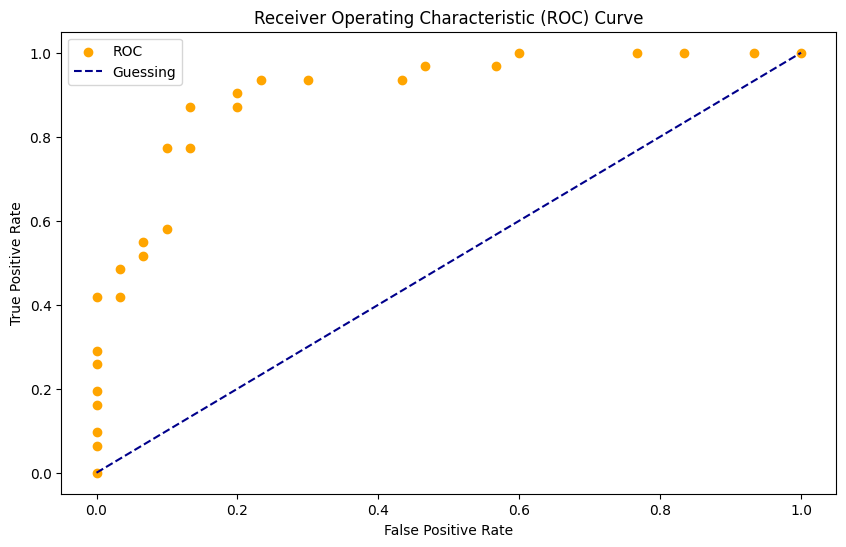

ROC AUC Score:  0.9123655913978496
[0.         0.06451613 0.09677419 0.16129032 0.19354839 0.25806452
 0.29032258 0.41935484 0.41935484 0.48387097 0.51612903 0.5483871
 0.58064516 0.77419355 0.77419355 0.87096774 0.87096774 0.90322581
 0.93548387 0.93548387 0.93548387 0.96774194 0.96774194 1.
 1.         1.         1.         1.        ]


In [36]:
# Evaluation with the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(x_test)
y_probs_positive = y_probs[:, 1] # all from second place
y_probs_negative = y_probs[:, 0] # all from first place

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


def plot_roc_curve(fpr, tpr):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x=fpr, 
               y=tpr, 
               color="orange", 
               label="ROC")
    ax.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    ax.set(xlabel="False Positive Rate", 
           ylabel="True Positive Rate", 
           title="Receiver Operating Characteristic (ROC) Curve")
    ax.legend()
    plt.show()

plot_roc_curve(fpr, tpr)
print("ROC AUC Score: ", roc_auc_score(y_test, y_probs_positive))
print(tpr)

### Stanovení optimální hranice predikční pravděpodobnosti 